### Business understanding

These are the questions i'm interested in answering

1. What are the top 5 countries with the highest job satisfaction?
2. Which countries have the most HoursPerWeek?
3. Do larger companies have professionals with higher salaries?

### Data Understanding


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Employed full-time   
4                      Employed full-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   
2                                  Bachelor's degree   
3                                    Doctoral degree   
4                                    Master's degree   

                                  MajorUndergrad  \
0                                            NaN   
1       Computer science or software engineering   
2       Computer science or software engineering   
3  A non-computer-focused engineering discipline   
4       Computer science or software engineering   

                                          HomeRemote  \
0                                                NaN   
1              More than half, but not all, the time   
2  Less than half the time, but at least one day ...   
3  Less than half the time, but at least one day ...   
4                                              Never   

                CompanySize       ...       StackOverflowMakeMoney Gender  \
0                       NaN       ...            Strongly disagree   Male   
1        20 to 99 employees       ...            Strongly disagree   Male   
2  10,000 or more employees       ...                     Disagree   Male   
3  10,000 or more employees       ...                     Disagree   Male   
4        10 to 19 employees       ...                          NaN    NaN   

  HighestEducationParents                          Race         SurveyLong  \
0             High school  White or of European descent  Strongly disagree   
1       A master's degree  White or of European descent     Somewhat agree   
2   A professional degree  White or of European descent     Somewhat agree   
3       A doctoral degree  White or of European descent              Agree   
4                     NaN                           NaN                NaN   

  QuestionsInteresting QuestionsConfusing InterestedAnswers    Salary  \
0       Strongly agree           Disagree    Strongly agree       NaN   
1       Somewhat agree           Disagree    Strongly agree       NaN   
2                Agree           Disagree             Agree  113750.0   
3                Agree     Somewhat agree    Strongly agree       NaN   
4                  NaN                NaN               NaN       NaN   

   ExpectedSalary  
0             NaN  
1         37500.0  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 154 columns]

### Prepare Data


In [70]:
def group_by(col1, col2, order):
    '''
    Input: 
    col1, col2 - two column names from the dataframe
    order - whether we want the order from ASC or DESC
    
    Output: grouping by the mean of col1 specific to col2. in decsending order with NaN values dropped
    '''
    results = df.groupby([col1]).mean()[col2].sort_values(ascending=[order]).dropna()
    return results

In [47]:
def col_prop(col):
    '''
    Input: 
    col - Column name
    
    Output: Returns the proportion of missing values for the column
    '''
    results = df[col].isnull().mean()
    return results

In [66]:
def graph_prop(df, num2, num=0):
    '''
    Input:
    df - pandas dataframe
    num2: upper bound of results displayed
    num - lower bound of results displayed (optional)
    
    Output:
    a bar graph in proportion to the dataframe given
    '''
    (df[:num2]/df.shape[0]).plot(kind="bar", color=('blue'))

In [49]:
def graph(df, num2, num=0):
    '''
    Input:
    df - pandas dataframe
    num2: upper bound of results displayed
    num - lower bound of results displayed
    
    Output:
    a bar graph to the dataframe given
    '''
    (df[num:num2]).plot(kind="bar", color=('blue'))

In [63]:
#Groups Job Satisifcation by Country
country_sat = group_by('Country', 'JobSatisfaction', False)
country_sat.head()

Country
Iraq                      10.0
Virgin Islands (USA)      10.0
Laos                       9.0
New Caledonia (French)     9.0
Guyana                     9.0
Name: JobSatisfaction, dtype: float64

In [51]:
# proportion of missing values in the Job Satisfaction column
# These null values were dropped from the dataframe
col_prop('JobSatisfaction')

0.20149722542142184

In [72]:
# Groups HoursPerWeek by Country
mostWorked = group_by('Country','HoursPerWeek', True)
mostWorked.head()

Country
Liechtenstein    0.0
Tadjikistan      0.0
Bouvet Island    0.0
Haiti            0.0
Andorra          0.0
Name: HoursPerWeek, dtype: float64

In [58]:
# proportion of missing values in the HoursPerWeek column
# These null values were dropped from the dataframe
col_prop('HoursPerWeek')

0.59580148675531353

In [71]:
# Group HoursPerWeek by Country
countryEducation = group_by('CompanySize','Salary', False)
countryEducation.head()

CompanySize
10,000 or more employees    75018.799267
1,000 to 4,999 employees    64870.410792
5,000 to 9,999 employees    64610.820185
500 to 999 employees        63475.130410
100 to 499 employees        60132.019080
Name: Salary, dtype: float64

In [60]:
# proportion of missing values in the Salary column
# These null values were dropped from the dataframe leaving 27% for analysis (possibly not the best apporach)
col_prop('Salary')

0.73777614909433564

### Data Modeling

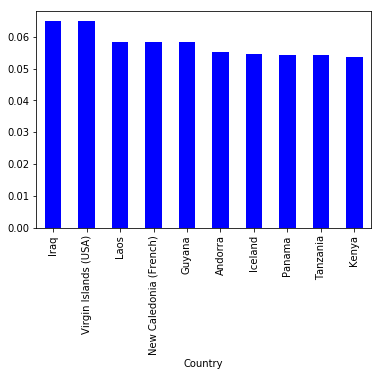

In [67]:
#graphs Job Satisifcation by Country
graph_prop(country_sat, 10)

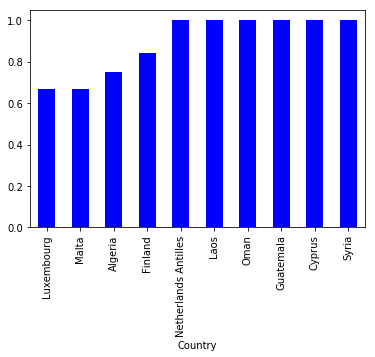

In [73]:
#graphs HoursperWork by Country
graph(mostWorked, 20, 10)

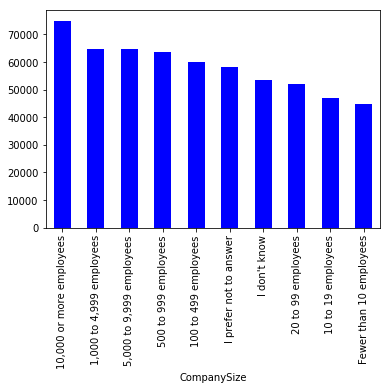

In [74]:
#graphs HoursPerWeek by Country
graph(countryEducation, 10)

### Evaluate the Results

For Graph #1 we can see that the top 10 countries have very high job satisfication. they don't vary by much

For Graph #2 even though we used 40% of the values in the dataset. we removed the 0 hour results from the graph since it's unlikely to have a job where you work zero hours

For Graph #3 we dropped all NaN values leaving us with about 27% of salary results to work with. with this data we can see that larger companies do have professionals with larger salaries